In [1]:
import pandas as pd
data=pd.read_excel("FinalData.xlsx")
data.shape

(2769, 57)

In [2]:
data.columns

Index(['Country', 'State', 'fips1', 'Democrat', 'Republican', 'PST045214',
       'PST040210', 'PST120214', 'POP010210', 'AGE135214', 'AGE295214',
       'AGE775214', 'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214',
       'RHI425214', 'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214',
       'POP715213', 'POP645213', 'POP815213', 'EDU635213', 'EDU685213',
       'VET605213', 'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213',
       'HSG495213', 'HSD410213', 'HSD310213', 'INC910213', 'INC110213',
       'PVY020213', 'BZA010213', 'BZA110213', 'BZA115213', 'NES010213',
       'SBO001207', 'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207',
       'SBO415207', 'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207',
       'RTN131207', 'AFN120207', 'BPS030214', 'LND110210', 'POP060210',
       'winner'],
      dtype='object')

In [3]:
data.loc[data["Democrat"]==data["Republican"]]

,Country,State,fips1,Democrat,Republican,PST045214,PST040210,PST120214,POP010210,AGE135214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,winner
352,USA,Arkansas,5015,0,0,27744,27446,1.1,27446,5.5,...,19.1,0,24110,265358,9728,53966,10,630.09,43.6,1
528,USA,South Dakota,46029,1473,1473,27938,27227,2.6,27227,7.0,...,24.9,0,344014,560668,21311,75569,149,688.50,39.5,1
1930,USA,Kentucky,21189,168,168,4508,4755,-5.2,4755,5.7,...,0.0,0,0,16715,3625,0,0,197.41,24.1,1
2566,USA,Maine,23027,0,0,39051,38786,0.7,38786,5.0,...,29.7,210346,522257,340345,8857,37580,76,729.92,53.1,1


In [4]:
check_df=pd.read_csv("primary_results.csv")

In [7]:
check_df.loc[(check_df["state_abbreviation"]=="SD")&(check_df["county"]=="Codington")]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
18142,South Dakota,SD,Codington,46029.0,Democrat,Bernie Sanders,645,0.438
18143,South Dakota,SD,Codington,46029.0,Democrat,Hillary Clinton,828,0.562
18287,South Dakota,SD,Codington,46029.0,Republican,Donald Trump,1473,0.673
18288,South Dakota,SD,Codington,46029.0,Republican,John Kasich,381,0.174
18289,South Dakota,SD,Codington,46029.0,Republican,Ted Cruz,336,0.153


**Adding up, we see that in the fips=46029, ie, Codington county, the maximum number of votes were for Republicans. So the "winner" field remains 1 (since Republicans are more popular there)**

In [8]:
check_df.loc[(check_df["state_abbreviation"]=="KY")&(check_df["county"]=="Owsley")]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
7205,Kentucky,KY,Owsley,21189.0,Democrat,Bernie Sanders,91,0.511
7206,Kentucky,KY,Owsley,21189.0,Democrat,Hillary Clinton,77,0.433
7633,Kentucky,KY,Owsley,21189.0,Republican,Donald Trump,168,0.625
7634,Kentucky,KY,Owsley,21189.0,Republican,John Kasich,12,0.045
7635,Kentucky,KY,Owsley,21189.0,Republican,Marco Rubio,24,0.089
7636,Kentucky,KY,Owsley,21189.0,Republican,Ted Cruz,58,0.216


**Adding up, we see that in the fips=21189, ie, Owsley county, the maximum number of votes were for Republicans. So the "winner" field remains 1 (since Republicans are more popular there)**

In [10]:
check_df.loc[(check_df["state_abbreviation"]=="AR")&(check_df["county"]=="Carroll")]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
838,Arkansas,AR,Carroll,5015.0,Democrat,Bernie Sanders,0,0.0
839,Arkansas,AR,Carroll,5015.0,Democrat,Hillary Clinton,0,0.0
1009,Arkansas,AR,Carroll,5015.0,Republican,Ben Carson,0,0.0
1010,Arkansas,AR,Carroll,5015.0,Republican,Donald Trump,0,0.0
1011,Arkansas,AR,Carroll,5015.0,Republican,John Kasich,0,0.0
1012,Arkansas,AR,Carroll,5015.0,Republican,Marco Rubio,0,0.0
1013,Arkansas,AR,Carroll,5015.0,Republican,Ted Cruz,0,0.0


**For the row corresponding to Carroll county, in Arkansas, we may delete it, since neither Democrat nor Republicans show a vote and similar is the case for Waldo county, in Maine (As shown below)**

In [14]:
check_df.loc[(check_df["state_abbreviation"]=="ME")&(check_df["county"]=="Waldo")]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
9021,Maine,ME,Waldo,92300466.0,Democrat,Bernie Sanders,0,0.0
9022,Maine,ME,Waldo,92300466.0,Democrat,Hillary Clinton,0,0.0


In [15]:
#data=data.drop([352,2566], axis=0)

In [16]:
data.reset_index(drop=True, inplace=True)

# One-hot encoding of states feature

In [17]:
data_ml=data.copy()

In [18]:
data_ml=data_ml.drop(["fips1",'Country','Democrat','Republican'], axis=1)

In [34]:
dummy_df = pd.get_dummies(data_ml, prefix="State",columns=["State"],
                          drop_first=True)

In [35]:
dummy_df.shape

(2767, 96)

In [36]:
pd.pandas.set_option('display.max_columns',None)

In [37]:
dummy_df.head()

,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,winner,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
0,24965,25416,-1.8,25417,5.4,21.5,19.4,51.5,69.7,28.3,0.3,0.4,0.0,1.2,1.2,68.8,89.6,1.0,2.3,76.8,12.2,1944,27.1,12002,76.4,6.2,91200,9809,2.49,18134,35947,21.6,335,4387,2.7,1393,1385,19.1,0.0,0.0,0.0,0.0,33.4,657498,0,71936,2841,10963,41,490.48,51.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,62486,61773,1.2,61773,7.1,26.7,13.5,51.5,79.6,18.3,0.3,0.4,0.0,1.3,2.2,77.8,86.5,1.1,14.5,72.1,10.2,3417,28.4,25851,70.3,6.8,88600,22527,2.70,19910,37587,18.7,1130,13159,3.1,4137,4289,0.0,0.0,0.0,0.0,1.4,25.4,0,0,525956,8808,40790,123,655.12,94.3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33021,33164,-0.4,33164,6.0,20.9,21.3,51.3,68.8,28.1,0.7,0.7,0.2,1.6,8.9,61.1,93.1,7.0,10.1,78.0,17.2,3255,21.2,21069,69.5,5.2,153600,14333,2.25,22703,39328,20.5,760,8779,-0.6,2306,2944,6.0,0.0,0.0,0.0,0.0,23.1,526157,59400,298001,7749,48144,67,449.50,73.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,426236,392365,8.6,392365,6.2,25.1,12.6,49.9,92.4,1.3,0.8,2.6,0.2,2.7,7.7,85.5,82.5,5.9,8.4,93.6,36.0,29195,19.6,167215,68.1,16.8,183600,151600,2.60,27452,55210,13.1,12216,174796,2.2,33207,42344,0.4,1.0,1.3,0.0,2.1,25.4,4942388,6006918,5855102,15720,795953,3968,1052.58,372.8,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3861,3976,-2.9,3976,4.2,17.0,24.9,48.5,96.4,0.2,1.0,0.5,0.1,1.8,3.2,93.6,88.3,1.0,2.1,92.8,21.9,545,19.3,2636,81.6,4.7,150500,1707,2.27,21555,35434,16.6,115,455,7.3,360,492,0.0,0.0,0.0,0.0,0.0,18.1,0,0,19965,5627,0,4,1363.06,2.9,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Separating target from features

In [38]:
y=dummy_df["winner"]

In [39]:
X=dummy_df.drop(["winner"],axis=1)

In [41]:
#X[X.isna().any(axis=1)]
X.isna().sum().sum()

0

In [42]:
y.isna().sum()

0

# Standardization for Logit Regression

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

**Splitting data into train and test**

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=42,test_size=0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression(solver='lbfgs', max_iter=1000)
logit_model.fit(X_train,y_train)
y_pred=logit_model.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [47]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8483754512635379
Precision is:  0.8770491803278688
Recall is:  0.8916666666666667
f1 score is:  0.884297520661157


In [62]:
from sklearn.metrics import classification_report
y_actual = pd.Series(y_test)
y_predicted = pd.Series(y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       194
           1       0.88      0.89      0.88       360

    accuracy                           0.85       554
   macro avg       0.83      0.83      0.83       554
weighted avg       0.85      0.85      0.85       554



In [49]:
confusion_matrix(y_test,y_pred)

array([[149,  45],
       [ 39, 321]], dtype=int64)

# Normalization for K-Nearest Neighbors

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
X_scaled_nor = scaler.fit_transform(X)

**Splitting data into train and test**

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled_nor,y,random_state=42,test_size=0.2)

In [66]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors = np.arange(3,15)
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [67]:
acc_values

[0.7996389891696751,
 0.8050541516245487,
 0.8032490974729242,
 0.7996389891696751,
 0.7924187725631769,
 0.8068592057761733,
 0.796028880866426,
 0.796028880866426,
 0.7851985559566786,
 0.7815884476534296,
 0.7689530685920578,
 0.7779783393501805]

Text(0, 0.5, 'accuracy')

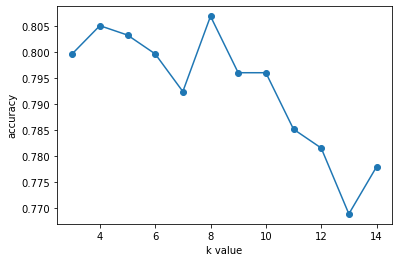

In [68]:
import matplotlib.pyplot as plt
plt.plot(neighbors,acc_values, 'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

**k=8 gives the highest value of accuracy**

In [69]:
classifier = KNeighborsClassifier(n_neighbors=8, metric='minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [70]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8068592057761733
Precision is:  0.8320209973753281
Recall is:  0.8805555555555555
f1 score is:  0.8556005398110662


In [71]:
confusion_matrix(y_test,y_pred)

array([[130,  64],
       [ 43, 317]], dtype=int64)

# SVM

In [72]:
from sklearn.svm import SVC
svm_linear= SVC(kernel='linear')
svm_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [77]:
y_pred=svm_linear.predict(X_test)

In [78]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8465703971119134
Precision is:  0.8590078328981723
Recall is:  0.9138888888888889
f1 score is:  0.8855989232839839


In [79]:
confusion_matrix(y_test,y_pred)

array([[140,  54],
       [ 31, 329]], dtype=int64)

# Radial SVM

In [75]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)

SVC()

In [80]:
y_pred=svm_radial.predict(X_test)

In [81]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred))
print("Recall is: ", recall_score(y_test,y_pred))
print("f1 score is: ", f1_score(y_test,y_pred))

Accuracy is:  0.8357400722021661
Precision is:  0.8387909319899244
Recall is:  0.925
f1 score is:  0.879788639365918


In [82]:
confusion_matrix(y_test,y_pred)

array([[130,  64],
       [ 27, 333]], dtype=int64)

# Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

In [84]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ", precision_score(y_test,y_pred, average='macro'))
print("Recall is: ", recall_score(y_test,y_pred,average='macro'))
print("f1 score is: ", f1_score(y_test,y_pred,average='macro'))

Accuracy is:  0.8104693140794224
Precision is:  0.8055395789854238
Recall is:  0.7662227949599083
f1 score is:  0.7790187475069805


In [85]:
confusion_matrix(y_test,y_pred)

array([[120,  74],
       [ 31, 329]], dtype=int64)

**Feature Importance**

In [87]:
X_scaled_nor=pd.DataFrame(X_scaled_nor)

In [89]:
pd.pandas.set_option('display.max_rows',None)

In [90]:
pd.Series(rf.feature_importances_,index=X_scaled_nor.columns).sort_values(ascending=False)

64    0.044175
15    0.041386
8     0.036582
26    0.034047
25    0.032379
9     0.028401
10    0.024325
30    0.023591
14    0.022604
13    0.022576
31    0.022478
5     0.022015
20    0.021088
47    0.020572
28    0.020169
2     0.019628
35    0.018758
49    0.018448
29    0.018090
18    0.017577
27    0.017163
63    0.016909
33    0.016709
19    0.016589
1     0.016445
24    0.016024
6     0.015869
45    0.015624
22    0.015146
50    0.014981
48    0.014572
34    0.014469
21    0.014439
46    0.014391
0     0.014297
3     0.014189
32    0.014025
23    0.013490
17    0.013362
36    0.013288
4     0.013225
16    0.013097
7     0.012858
42    0.012461
11    0.011932
54    0.011473
44    0.010789
43    0.010514
38    0.009586
37    0.008588
41    0.008022
92    0.006916
39    0.006476
87    0.004704
12    0.004480
85    0.003484
94    0.003378
80    0.002962
57    0.002844
78    0.002339
53    0.002029
58    0.002018
71    0.001921
69    0.001915
89    0.001857
93    0.001851
91    0.00